In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Null Hypothesis:
## The tripduration of men biking on average is the same or significantly larger than the tripduration of women biking on average.
## Alternative Hypothesis:
## The tripduration of men biking on average is significantly less than the tripduration of women biking on average.
# _$H_0$_ : $W_{\mathrm{total}} - {M_{\mathrm{total}}} <= 0$ 
# _$H_1$_ : $W_{\mathrm{total}} - {M_{\mathrm{total}}} > 0$

## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.drop([ u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', 
       u'usertype', u'bikeid',u'birth year',u'date'], axis=1, inplace=True)

In [7]:
df.head()

,tripduration,gender
0,801,2
1,379,1
2,2474,2
3,818,2
4,544,1


In [8]:
df.groupby(['gender']).describe()

tripduration
gender                     
0      count    2303.000000
       mean     1460.534086
       std      1997.558542
       min        62.000000
       25%       580.000000
       50%      1059.000000
       75%      1663.500000
       max     35251.000000
1      count  161563.000000
       mean      624.684340
       std       799.978907
       min        60.000000
       25%       332.000000
       50%       493.000000
       75%       739.000000
       max     43016.000000
2      count   33064.000000
       mean      713.572133
       std      1041.078337
       min        60.000000
       25%       378.000000
       50%       564.000000
       75%       838.000000
       max     43013.000000

In [9]:
#As we can find in the describe, the number of trips of women is 5 times of that of men, \
#so I pick one trip out of every five trips to make the count of two gender the same.
df = df[df['gender'] != 0]
df_female = df[(df['gender'] == 1) & (df['tripduration'] <= 2500)][::5]
df_male = df[(df['gender'] == 2) & (df['tripduration'] <= 2500)]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


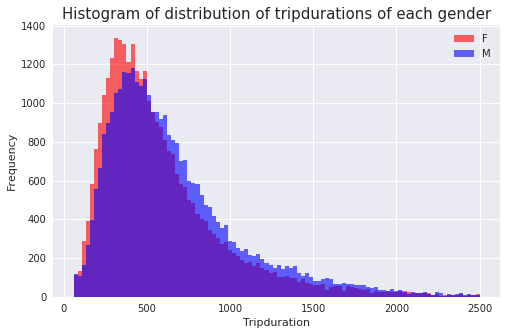

In [19]:
fig = plt.figure(figsize = (8,5))
fig.add_subplot(1,1,1)
plt.hist(x = df_female['tripduration'], bins = 100, color = 'red', alpha = .6)
plt.hist(x = df_male['tripduration'], bins = 100, color = 'blue', alpha = .6)
plt.xlabel('Tripduration')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of tripdurations of each gender', fontsize = 15)

plt.legend('FM')

In [21]:
#df = pd.concat([df_female, df_male])
#ax = sns.boxplot(x = df['gender'], y = df['tripduration'], notch = True)
#ax.set_xlabel("Gender")
#ax.set_ylabel("Tripduration")
#ax.set_title("Boxplot for Tripduration with Genders")
#ax.legend('FM')

## statistical test

In [12]:
def twoSampZ(mu1, mu2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((mu1 - mu2) - mudiff)/pooledSE
    pval = (1 - norm.cdf(abs(z)))
    return z, pval

In [13]:
X1 = df_female['tripduration']
X2 = df_male['tripduration']
z, p = twoSampZ(X1.mean(), X2.mean(), (X1.mean() - X2.mean()), X1.std(), X2.std(), X1.count(), X2.count())

In [14]:
print("The Z value of the test is {}, and the p-value of the test is {}".format(z, p))

The Z value of the test is 0.0, and the p-value of the test is 0.5


## Since the p-value of the test is 0.5 > 0.05, we fail to reject the null hypothesis and conclude that the tripduration of men biking on average is the same or significantly larger than the tripduration of women biking on average under significance level 0.05.